### Тематическое моделирование 



__Важно__: Во второй половине ноутбука мы будем работать с библиотекой BigARTM, запускать которую удобнее всего в google colab (ниже будет код для установки библиотеки в colab), или с помощью Docker-образа. Если вы планируете работать с использованием Docker, сперва запустите его и работайте с ноутбуком внутри окружения, чтобы не делать предобработку данных дважды. Инструкция ниже.


Есть несколько сценариев работы с BigARTM, среди которых:

- установка библиотеки для Питона: инструкция [здесь](https://bigartm.readthedocs.io/en/stable/installation/index.html)

- запуск Docker образа с библиотекой

Если вы предпочтете второй сценарий, вам нужно:
1. Скачать и установить [Docker](https://www.docker.com/get-started) для своей ОС. Запустить Docker. 
2. Скачать образ (Dockerfile), в котором устанавливается большинство библиотек для анализа данных, Jupyter Notebook и сама BigARTM. Ссылка на файл лежит рядом со ссылкой на этот ноутбук в материалах недели.
3. Собрать образ: это можно сделать через командную строку (находясь в папке, где лежит скачанный в п.2 Dockerfile):

$ docker build -t artm .

$ docker run -p 8888:8888 artm

После выполнения этих двух команд запустится Jupyter Notebook, в командной строке будет написан путь к нему в таком формате:

Or copy and paste one of these URLs:
        http://de0ad378d760:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d
     or http://127.0.0.1:8888/?token=5897bc15b494ca17f0d996763a8d05a71f1170af3455e96d   

Откройте любой из URL, там поднят Jupyter Notebook с уже установленными библиотеками.

При работе не забывайте, что все ноутбуки, которые вы создаете внутри этого Docker образа, исчезнут, как только вы остановите Docker, поэтому перед окончанием работы скачайте ноутбук с результатом себе на компьютер.


Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее.

In [1]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

--2021-09-14 06:11:33--  https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz
Распознаётся github.com (github.com)... ошибка: Неизвестное имя или служба.
wget: не удаётся разрешить адрес «github.com»


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
next(records)

LentaRecord(
    url='https://lenta.ru/news/2018/12/14/cancer/',
    title='Названы регионы России с\xa0самой высокой смертностью от\xa0рака',
    text='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.',
    topic='Россия',
    tags='Общество',
    date=None
)

In [4]:
data = [(record.title, record.topic, record.text, record.tags) for record in records]

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [6]:
data = pd.DataFrame(data, columns=['title','topic','text','tags'])

In [7]:
data.sample(3)

,title,topic,text,tags
691704,Новое землетрясение в Афганистане превратило десятки домов в руины,Мир,"Сильное землетрясение произошло в северных провинциях Афганистана в районе Нахрина. По информации очевидцев, разрушены десятки зданий, сообщает Reuters. ""В сообщениях, которые поступили к нам за последние полчаса, утверждается, что в эпицентре землетрясения очень сильные разрушения"", - прокомментировал один из афганских военных, находящийся в соседней провинции Кундуз. По данным пакистанских сейсмологов, сила подземных толчков достигала 5,6 баллов по шкале Рихтера. Две недели назад в этом же районе в результате сильного землетрясения погибли более 1000 человек. Доступ в пострадавшие районы по-прежнему затруднен из-за плохой погоды, разрушенных дорог и большого количества мин, установленных в ходе интенсивных боев в регионе.",Все
567008,Латвия попросит ЕС расчистить дороги в Россию,Бывший СССР,"Премьер-министр Латвии Айгар Калвитис намерен просить помощи у Еврокомиссии в решении вопроса о пробках, возникших на контрольно-пропускных пунктах на латвийско-российской границе. Об этом, как пишет латвийская интернет-газета NovoNews, глава правительства прибалтийской республики заявил в эфире латвийского телевидения. Калвитис сообщил, что в четверг он планирует встретиться в Брюсселе с главой Еврокомиссии Жозе Мануэлем Баррозу, чтобы обсудить сложившуюся на границе с Россией ситуацию. ""Очереди на границе создаются не по вине Латвии и решение проблемы - дело всей Европы"", - уверен латвийский премьер. По данным на 19 ноября, в очередях на латвийско-российской границе скопились более 1600 грузовиков. Нa контрольно-пропускном пункте ""Терехово"" очередь на неделю увеличилась с 923 до 1037 грузовиков, а на КПП ""Гребнево"" она выросла с 480 до 570 фур. Одной из основных причин очередей на российско-латвийской границе специалисты называют переориентацию транспортных потоков с белорусско-российского на латвийско-российский участок границы в связи с увеличением дорожного налога и усилением транспортного контроля в Белоруссии. В Минске уже заявили, что Белоруссия не имеет к очередям на границе никакого отношения и даже предложили свою помощь в решении этой проблемы.",Все
711808,"Девушке, выпрыгнувшей с 11 этажа, не удалось свести счеты с жизнью",Россия,"В Нижнем Новгороде 18-летняя девушка, решившая свести счеты с жизнью из-за ссоры с другом, выпрыгнула из окна своей квартиры, расположенной на 11 этаже, и осталась жива, сообщает ИТАР-ТАСС. Несостоявшуюся самоубийцу спасли старые доски козырька над входом в подъезд, смягчившие удар. Девушка получила ушибы внутренних органов и отправлена на обследование и лечение в нижегородский институт травмотологии и ортопедии. Соседи, услышавшие шум и крики о помощи, вызвали ""скорую"", которая доставила пострадавшую в больницу. Соседи также известили о произошедшем родителей девушки, которые все это время спокойно смотрели телевизор в соседней комнате.",Все


In [8]:
len(data)

739350

In [9]:
data.topic.value_counts().head(15)

Россия               160518
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Name: topic, dtype: int64

Для ускорения вычислений оставим тексты из 5 тем: 'Мир', 'Бывший СССР', 'Из жизни', 'Ценности', 'Путешествия'.

In [10]:
# topics = ['Экономика', 'Спорт', 'Культура', 'Путешествия', 'Наука и техника']

topics = ['Мир', 'Бывший СССР', 'Из жизни', 'Ценности', 'Путешествия']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

231867

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [11]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
# from pymystem3 import Mystem

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mitko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# ! pip install pymorphy2

In [14]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [15]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [16]:
data.text.iloc[1]

'С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3\xa0миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера Мюллера показало, что по меньшей мере 14 человек из окружения президента США Дональда Трампа контактировали с россиянами во время его избирательной кампании и последующего переходного периода перед вступлением в должность главы государства. Мюллер с 2017 года ведет дело о якобы российском вмешательстве в американские выборы в 2016-м. Перед ним поставлена задача выяснить, был ли сговор между штабом 

In [17]:
print(preprocess(data.text.iloc[1]))

['начало', 'расследование', 'российский', 'вмешательство', 'выборы', 'власть', 'сша', 'потратить', 'миллион', 'доллар', 'это', 'сообщать', 'associated', 'press', 'ссылка', 'отчёт', 'министерство', 'юстиция', 'сша', 'документ', 'содержаться', 'дать', 'расход', 'следствие', 'апрель', 'сентябрь', 'год', 'полгода', 'потратить', 'миллион', 'доллар', 'который', 'миллион', 'доллар', 'уйти', 'зарплата', 'сотрудник', 'тысяча', 'поездка', 'сопутствовать', 'расход', 'ранее', 'минюст', 'сша', 'публиковать', 'отчёт', 'затрата', 'дело', 'российский', 'вмешательство', 'предыдущий', 'месяц', 'декабрь', 'расследование', 'спецпрокурор', 'робер', 'мюллер', 'показать', 'малый', 'мера', 'человек', 'окружение', 'президент', 'сша', 'дональд', 'трамп', 'контактировать', 'россиянин', 'время', 'избирательный', 'кампания', 'последующий', 'переходный', 'период', 'вступление', 'должность', 'глава', 'государство', 'мюллер', 'год', 'вести', 'дело', 'якобы', 'российский', 'вмешательство', 'американский', 'выборы', 'п

Ниже мы оставим только случайные 10,000 текстов из нашей коллекции, чтобы ускорить вычисления:

In [18]:
data = data.sample(10000)
data.topic.value_counts()

Мир            5870
Бывший СССР    2296
Из жизни       1192
Ценности       352 
Путешествия    290 
Name: topic, dtype: int64

In [19]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [20]:
data['text'] = preprocessed_text
data.sample(3)

,title,topic,text,tags
21591,Венгерский министр ответил на украинские обвинения в работе на Россию,Бывший СССР,"[министр, иностранный, дело, венгрия, петер, сийяртый, отвергнуть, обвинение, будапешт, действовать, указание, россия, вопрос, защита, право, венгр, проживать, закарпатский, область, украина, интервью, глава, мид, понедельник, июнь, опубликовать, европейский, правда, данные, сийяртый, представитель, украина, нашёптывать, западный, дипломат, антивенгерский, пропаганда, известно, мягкий, дипломатия, преднамеренно, распространять, слух, мол, действовать, влияние, россия, это, просто, ложь, нужный, никакой, россия, определить, защищать, свой, община, сказать, независимый, государство, волновать, думать, россия, наш, политика, отношение, меньшинство, знать, закарпатие, венгр, примерно, тысяча, стремиться, защищать, право, случай, необходимость, защищать, любой, сша, россия, новый, зеландия, угодный, ответить, сийяртый, реплика, давление, будапешт, киев, вопрос, закарпатский, венгр, выглядеть, отвечать, интерес, также, сийяртый, затронуть, тема, ...]",Украина
287535,На Украине проверят слухи о взорванных дворнягах,Бывший СССР,"[военный, прокуратура, украина, начало, расследование, связь, появиться, сми, информация, жестокий, расправа, бездомный, собака, воинский, часть, это, сообщать, украинский, новость, информация, жестокий, убийство, животное, ранее, распространить, депутат, верховный, рада, бывший, министр, оборона, украина, анатолий, гриценко, опубликовать, прийти, письмо, житомир, который, описываться, метод, воспитание, солдат, аэромобильный, бригада, солдат, почувствовать, война, укреплять, боевой, дух, лично, командир, бригада, приказать, убить, бездомный, собака, глаз, солдат, цитировать, письмо, цензор, сначала, прибить, сапёрный, лопатка, затем, взорвать, взрывпакет, командир, заставить, солдат, смотреть, кровь, разорвать, внутренний, орган, уточнять, укринформ, просьба, вмешаться, бывший, министр, обратиться, женщина, который, служить, бригада, контракт, гриценко, комментировать, это, выразить, сожаление, руководить, министерство, оборона, ибо, комбриг, ...]",
196321,Заявление главы разведки Франции в Госдуме сравнили с «ушатом холодной воды»,Мир,"[заявление, глава, управление, военный, разведка, франция, кристоф, гомар, россия, готовить, военный, вторжение, украина, равносильно, ушат, холодный, вода, это, передавать, тасс, сказать, первый, замруководитель, фракция, единый, россия, член, комитет, оборона, франц, клинцевич, традиция, который, заложить, генерал, шарль, голля, живой, франция, страна, занимать, особый, позиция, нато, подчеркнуть, слово, сегодня, это, проявиться, французский, генерал, сказать, правда, ситуация, украина, одновременно, обвинить, американский, разведка, выполнение, политический, заказ, фон, всеобщий, истерия, запад, это, заявление, глава, французский, разведка, сравнить, ушатый, холодный, вода, констатировать, российский, парламентарий, слово, оставаться, ждать, наступить, отрезвление, глава, французский, разведка, генерал, кристоф, гомар, выступать, национальный, ассамблея, страна, нижний, палата, парламент, отметить, россия, готовить, военный, ...]",Политика


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [21]:
# !pip install -U gensim

In [22]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [23]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [24]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [43]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

CPU times: user 7.81 s, sys: 0 ns, total: 7.81 s
Wall time: 7.81 s


Посмотрим на получившиеся темы:

In [44]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.021*"год" + 0.016*"который" + 0.011*"это" + 0.008*"свой" + 0.007*"суд" + 0.007*"дело" + 0.006*"сообщать" + 0.006*"человек" + 0.005*"однако" + 0.005*"бывший"'),
 (1,
  '0.017*"президент" + 0.015*"украина" + 0.012*"партия" + 0.011*"министр" + 0.010*"это" + 0.010*"который" + 0.010*"страна" + 0.010*"выборы" + 0.009*"год" + 0.008*"правительство"'),
 (2,
  '0.018*"человек" + 0.013*"сообщать" + 0.011*"город" + 0.010*"погибнуть" + 0.009*"находиться" + 0.009*"который" + 0.009*"произойти" + 0.008*"результат" + 0.008*"самолёт" + 0.007*"время"'),
 (3,
  '0.020*"год" + 0.013*"это" + 0.010*"который" + 0.009*"сша" + 0.007*"тысяча" + 0.007*"компания" + 0.007*"свой" + 0.006*"стать" + 0.006*"процент" + 0.006*"доллар"'),
 (4,
  '0.013*"страна" + 0.013*"россия" + 0.011*"это" + 0.010*"заявить" + 0.010*"сша" + 0.009*"военный" + 0.009*"российский" + 0.007*"территория" + 0.007*"который" + 0.006*"год"')]

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [29]:
# !pip install pyLDAvis

### Напомним темы: 'Мир', 'Бывший СССР', 'Из жизни', 'Ценности', 'Путешествия'.

In [46]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

CPU times: user 2.23 s, sys: 16.1 ms, total: 2.24 s
Wall time: 2.35 s


### Все темы как будто про политику.

Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [47]:
print(lda.log_perplexity(corpus))

-7.782689262050956


In [48]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  0.00041688988715078647


In [49]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.4024607556436794


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/5 [00:00<?, ?it/s]

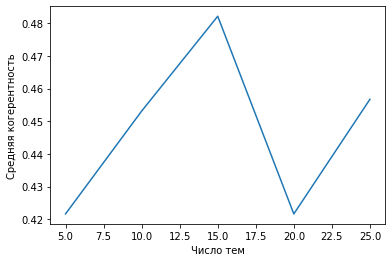

In [51]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

Подробнее о метриках для оценки тематических моделей:
1. [Перплексия](http://qpleple.com/perplexity-to-evaluate-topic-models/)
2. Когерентность: [один пост](http://qpleple.com/topic-coherence-to-evaluate-topic-models/), [другой пост](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

### Самый высокий показатель - при количестве тем = 15.

In [52]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)

### По показателям вроде 15 тем и лучше, но по факту некоторые из них сильно пересекаются, например, 4 и 10. Но в приниципе, тематику распознать можно.